In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
customers = pd.read_csv("EcommerceCustomers.xls")
customers.head()
# customers.sample(n=5) This will give any 5 random datesets

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [33]:
# total_sum = 0
# for i in customers["Avg. Session Length"]:
#     total_sum += i

# print("The Mean of Avg. Session Length is: ", (total_sum / 500))
print()
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


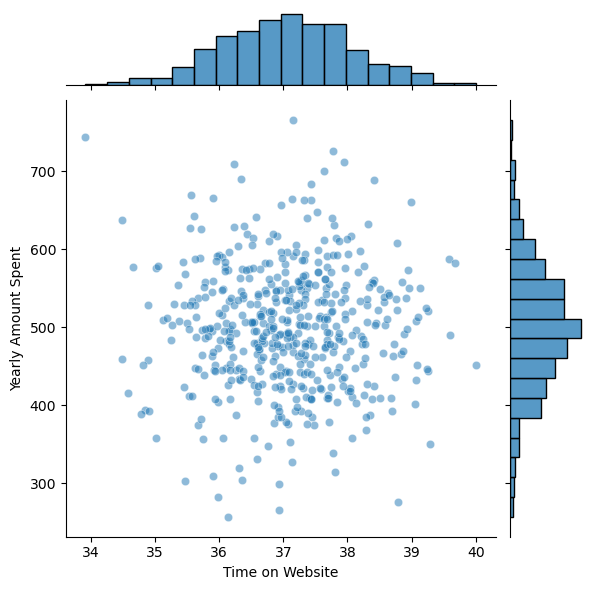

In [34]:
#plt.figure(figsize=(5, 15))
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers, alpha=0.5)

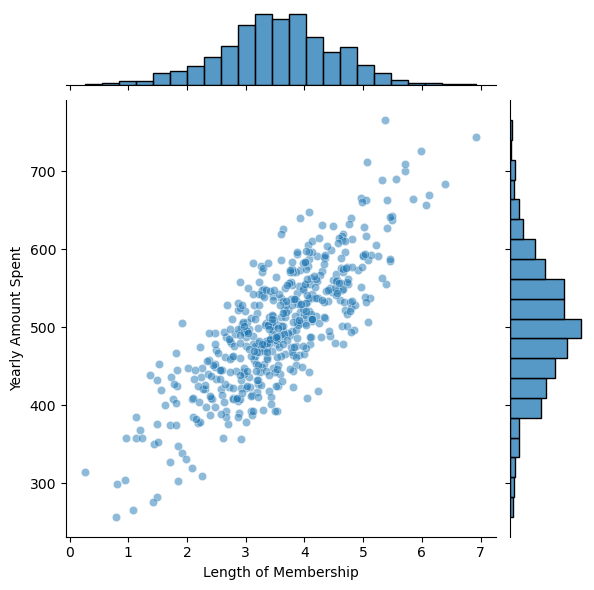

In [35]:
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent", data=customers, alpha=0.5)

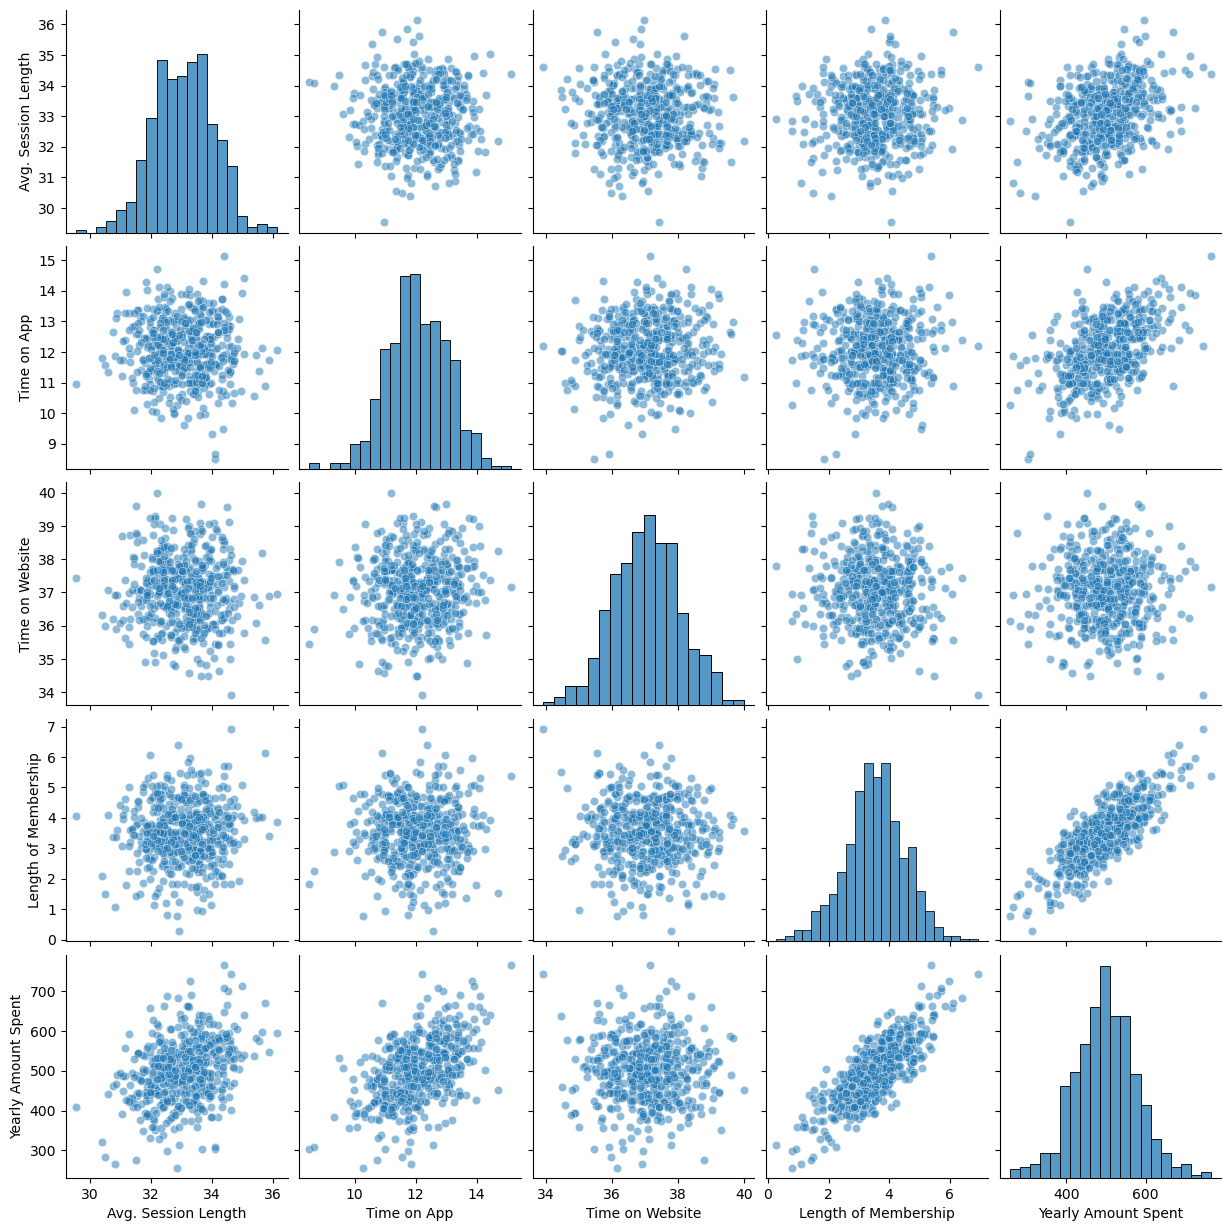

In [36]:
sns.pairplot(
            customers,
            kind="scatter",
            plot_kws={'alpha':0.5}
)

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

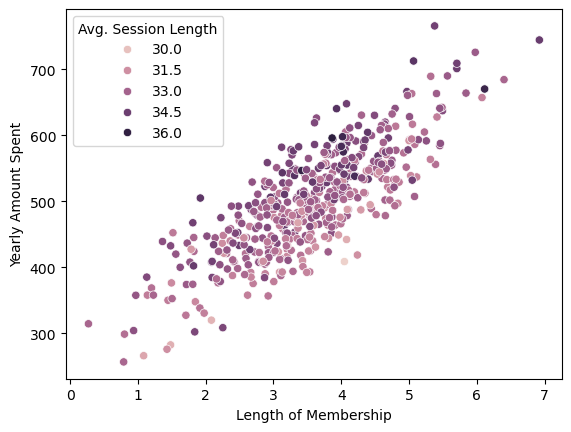

In [37]:
sns.scatterplot(data=customers, x="Length of Membership", y="Yearly Amount Spent", hue="Avg. Session Length")

<Axes: >

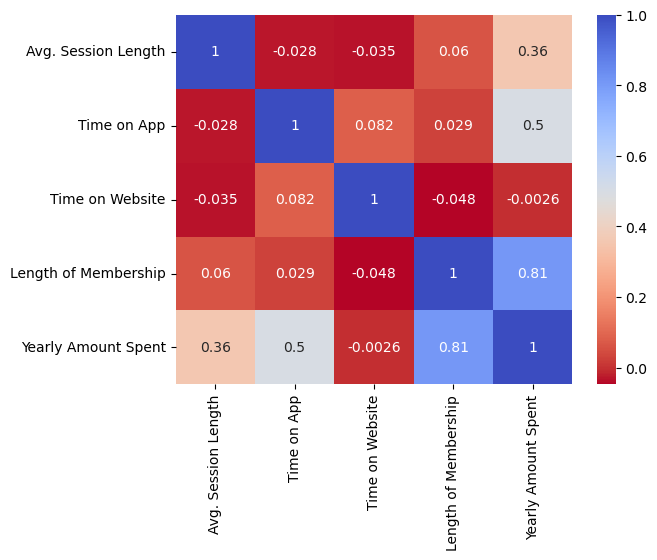

In [41]:
customers_numeric = customers.select_dtypes(include='number')
#print(customers_numeric)
sns.heatmap(data=customers_numeric.corr(), annot = True, cmap = "coolwarm_r")

In [42]:
# Accprding to the above heatmap we found out that there are strong Linear correlation between some of the variables which are given below order 
# wise according to there importance
# 1. Length of Membership
# 2. Time on App
# 3. Avg. Session Length

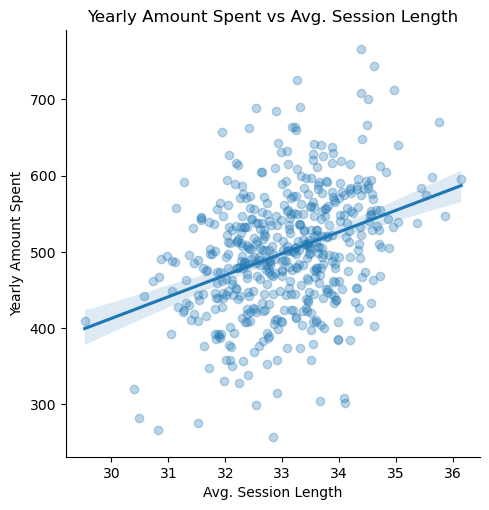

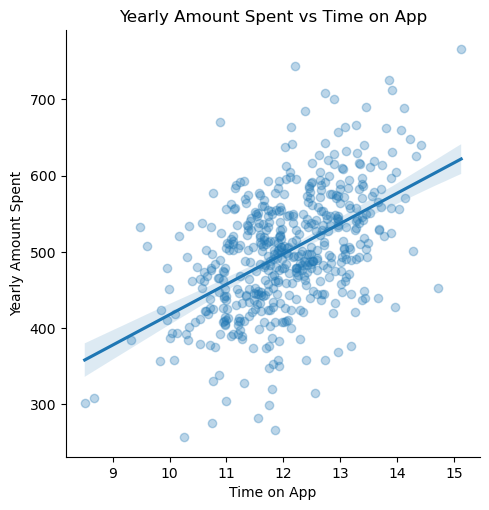

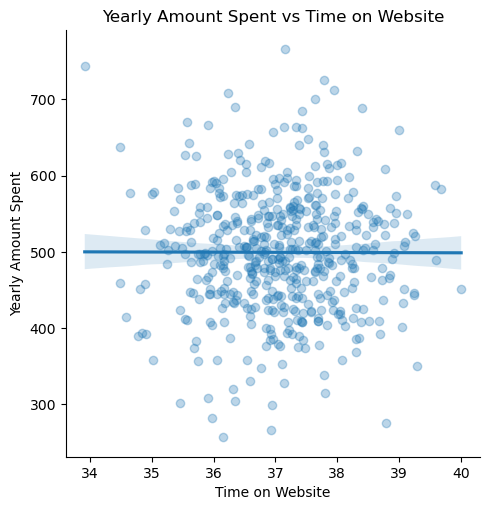

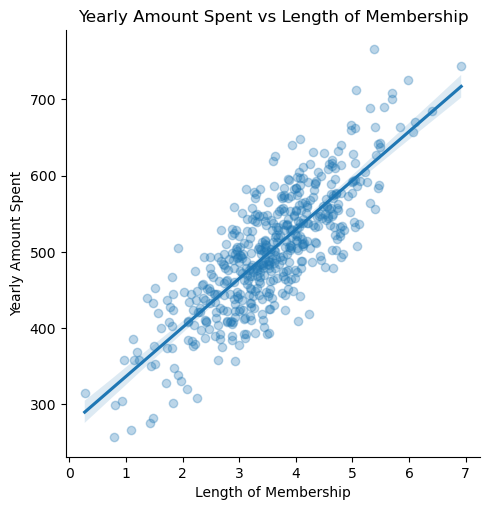

In [43]:
# A regplot
for col in customers_numeric:
    # For not plotting the same graph
    if(col == 'Yearly Amount Spent'):
        continue
    else:
        sns.lmplot(x=col, y="Yearly Amount Spent", data=customers, scatter_kws={'alpha':0.3})
        plt.title(f"Yearly Amount Spent vs {col}")
        plt.show()

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = customers["Yearly Amount Spent"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print("The length of X_Train is: ", len(X_train))
print("The length of X_test is: ", len(X_test))

The length of X_Train is:  375
The length of X_test is:  125


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
x_ctr = 0
for col in X.columns:
    print("The Coefficient for ", col , " is ", lr.coef_[x_ctr], " and Intercept is " , lr.intercept_)
    x_ctr += 1

# Coefficients in a datadrame

cdf = pd.DataFrame(lr.coef_, X.columns, columns=["Coef"])
cdf

The Coefficient for  Avg. Session Length  is  25.52607651900529  and Intercept is  -1054.0979896442263
The Coefficient for  Time on App  is  39.125564408950126  and Intercept is  -1054.0979896442263
The Coefficient for  Time on Website  is  0.5463736627092866  and Intercept is  -1054.0979896442263
The Coefficient for  Length of Membership  is  61.676385994012534  and Intercept is  -1054.0979896442263


,Coef
Avg. Session Length,25.526077
Time on App,39.125564
Time on Website,0.546374
Length of Membership,61.676386


In [51]:
# r squared
lr.score(X, y)

0.9842756124489649

In [52]:
# Now that our linear regression model is trained, we can now Test our model
predicted_values = lr.predict(X_test)

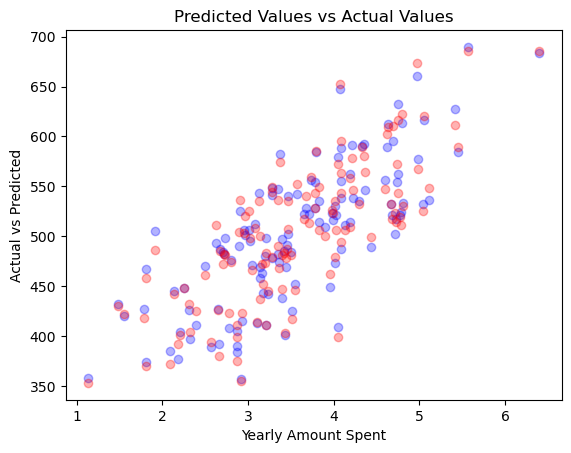

In [53]:
# Scatter plot for Original Values and predicted values by our linear regression model
plt.scatter(X_test["Length of Membership"], y_test, color="blue", alpha=0.3)
plt.scatter(X_test["Length of Membership"], predicted_values, color="red", alpha=0.3)
plt.xlabel("Yearly Amount Spent")
plt.ylabel("Actual vs Predicted")
plt.title("Predicted Values vs Actual Values")
plt.show()

In [54]:
import joblib

In [56]:
joblib.dump(lr, 'liearRegressionHouseModel2.joblib')

['liearRegressionHouseModel2.joblib']